In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [77]:
#データフレームへの読み込み
df = pd.read_csv('/Users/rukasumichika/最終課題/data/LengthOfStay.csv')

In [78]:
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [79]:
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [80]:
df.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

In [81]:
# 'rcount' 列で '5+' を 5 に変換
df['rcount'] = df['rcount'].replace('5+', 5)
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [82]:
df.replace({'M': 0,'F': 1} ,inplace=True)
df.head()

/var/folders/sz/_tm01cw955b24xbf2346dfcr0000gn/T/ipykernel_72277/1509376219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'M': 0,'F': 1} ,inplace=True)


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,1,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5,1,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,1,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,1,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,1,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [83]:
# vdata列とdischarged列をTimestamp型に変換（日付のみを扱う）
df['vdate'] = pd.to_datetime(df['vdate']).dt.date
df['discharged'] = pd.to_datetime(df['discharged']).dt.date

# vdata列を数字（YYYYMMDD）形式に変換
df['vdate'] = pd.to_datetime(df['vdate']).dt.strftime('%Y%m%d').astype(int)
df['discharged'] = pd.to_datetime(df['discharged']).dt.strftime('%Y%m%d').astype(int)

# 結果の確認
print(df[['vdate', 'discharged']].head())

      vdate  discharged
0  20120829    20120901
1  20120526    20120602
2  20120922    20120925
3  20120809    20120810
4  20121220    20121224


In [84]:
# facidに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df['facid'], prefix='facid')

# bool型をint型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df = pd.concat([df, encoded], axis=1)

# 'category' 列を削除
df.drop('facid', axis=1, inplace=True)

# 結果を確認
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,pulse,respiration,secondarydiagnosisnonicd9,discharged,lengthofstay,facid_A,facid_B,facid_C,facid_D,facid_E
0,1,20120829,0,1,0,0,0,0,0,0,...,96,6.5,4,20120901,3,0,1,0,0,0
1,2,20120526,5,1,0,0,0,0,0,0,...,61,6.5,1,20120602,7,1,0,0,0,0
2,3,20120922,1,1,0,0,0,0,0,0,...,64,6.5,2,20120925,3,0,1,0,0,0
3,4,20120809,0,1,0,0,0,0,0,0,...,76,6.5,1,20120810,1,1,0,0,0,0
4,5,20121220,0,1,0,0,0,1,0,1,...,67,5.6,2,20121224,4,0,0,0,0,1


In [85]:
# 'eid', 'vdate', 'discharged'を除く全ての列を抽出
df_filtered = df.drop(columns=['eid', 'vdate', 'discharged'])

# 抽出した列の確認
print(df_filtered.head())

  rcount  gender  dialysisrenalendstage  asthma  irondef  pneum  \
0      0       1                      0       0        0      0   
1      5       1                      0       0        0      0   
2      1       1                      0       0        0      0   
3      0       1                      0       0        0      0   
4      0       1                      0       0        0      1   

   substancedependence  psychologicaldisordermajor  depress  psychother  ...  \
0                    0                           0        0           0  ...   
1                    0                           0        0           0  ...   
2                    0                           0        0           0  ...   
3                    0                           0        0           0  ...   
4                    0                           1        0           0  ...   

         bmi  pulse  respiration  secondarydiagnosisnonicd9  lengthofstay  \
0  30.432418     96          6.5       

In [86]:
# float型の列をint型に変換
df_filtered = df_filtered.astype({col: 'int' for col in df_filtered.select_dtypes(include='float').columns})

#　object型の列をint型に変換
df_filtered['rcount'] = df_filtered['rcount'].astype(int)

# 結果を確認
print(df_filtered.dtypes)

rcount                        int64
gender                        int64
dialysisrenalendstage         int64
asthma                        int64
irondef                       int64
pneum                         int64
substancedependence           int64
psychologicaldisordermajor    int64
depress                       int64
psychother                    int64
fibrosisandother              int64
malnutrition                  int64
hemo                          int64
hematocrit                    int64
neutrophils                   int64
sodium                        int64
glucose                       int64
bloodureanitro                int64
creatinine                    int64
bmi                           int64
pulse                         int64
respiration                   int64
secondarydiagnosisnonicd9     int64
lengthofstay                  int64
facid_A                       int64
facid_B                       int64
facid_C                       int64
facid_D                     

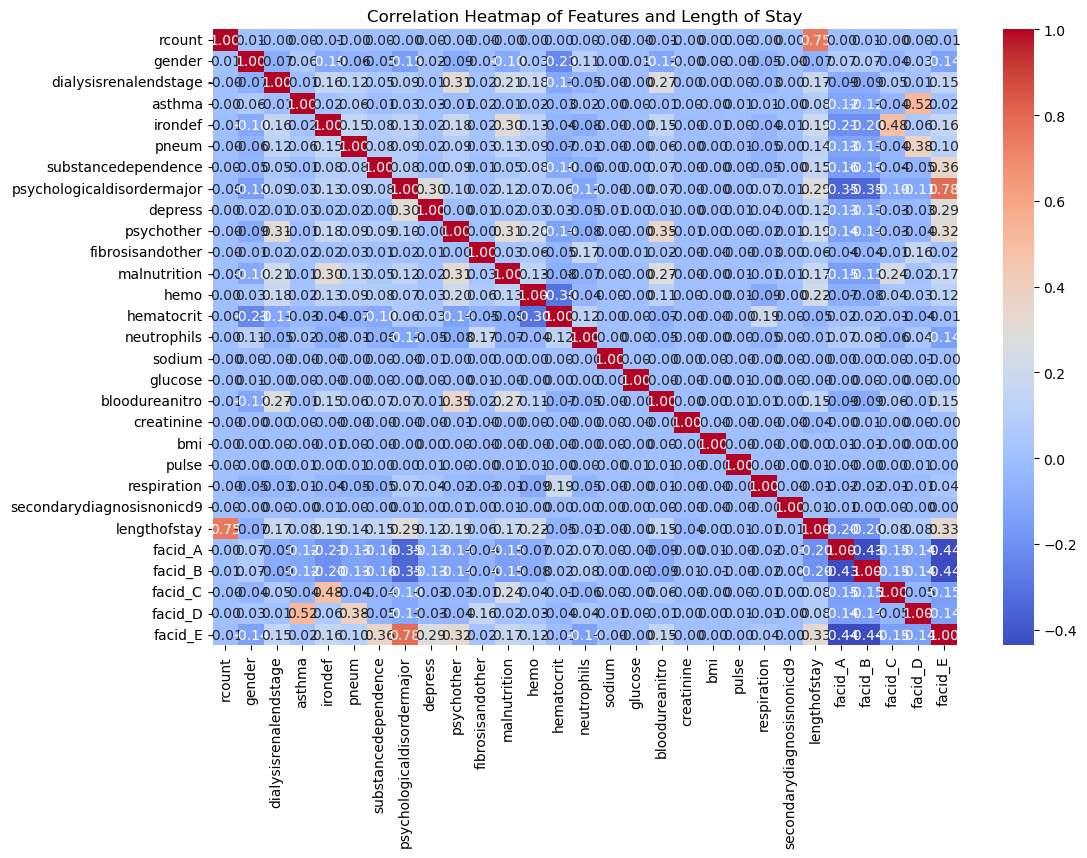

In [87]:
# 相関行列を作成
corr_matrix = df_filtered.corr()

# ヒートマップ作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Length of Stay')
plt.show()


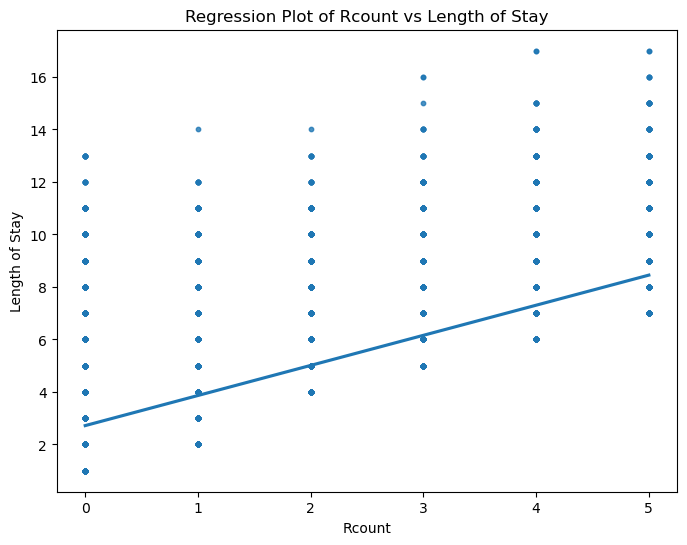

In [88]:
# 回帰線付き散布図
plt.figure(figsize=(8, 6))
sns.regplot(x=df_filtered['rcount'], y=df_filtered['lengthofstay'], scatter_kws={'s':10})

# タイトルとラベルを追加
plt.title('Regression Plot of Rcount vs Length of Stay')
plt.xlabel('Rcount')
plt.ylabel('Length of Stay')

plt.show()


In [90]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'